In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for problem 3
from scipy.ndimage import gaussian_filter
from scipy.ndimage import zoom
from skimage.color import rgb2gray
from skimage.transform import resize

# 3. Hybrid Images 

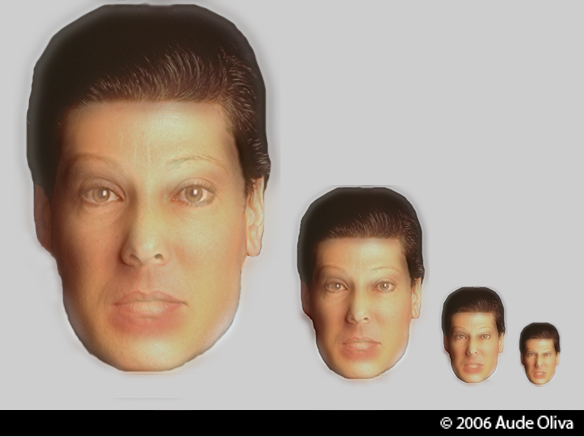

The goal of this assignment is to write an image filtering function and use it to create [hybrid images](https://en.wikipedia.org/wiki/Hybrid_image) using a simple version of the [SIGGRAPH 2006 paper by Oliva, Torralba, and Schyns](https://dl.acm.org/doi/10.1145/1141911.1141919). Hybrid images are static images that change in interpretation as a function of the viewing distance. The basic idea is that high frequency tends to dominate perception when it is available, but, at a distance, only the low frequency (smooth) part of the signal can be seen. By blending the high frequency portion of one image with the low-frequency portion of another, you get a hybrid image that leads to different interpretations at different distances.


### 3.1 Image Filtering [15pts]
Implement a function that takes a color image as input and splits it into a low-frequency component and a high-frequency component. To get the low-frequency component, you can blur the image using a Gaussian filter using ***scipy.ndimage.gaussian_filter*** where the **sigma** parameter of the Gaussian controls the amount of blur. To get the high-frequency component, you can simply take the original image and subtract out the low-frequency component.

In [3]:
def split_bands(image, sigma):
    """
    Given an image, split the image into two frequency bands
    and return the two components (low,high)
    
    Parameters
    ----------
    image : numpy.array (dtype=float)
        a tuple of two HxWx3 arrays containing low/high freq components respectively

    sigma : float
        the width of the gaussian filter
        
    Returns
    -------
    tuple of numpy.array (dtype=float)
        two HxWx3 arrays containing low/high freq components respectively
          
    """
    gray_image = rgb2gray(image)
    
    image_low = gaussian_filter(gray_image, sigma)
    image_high = gray_image - image_low
    
    ans = (image_low, image_high)
    
    return ans   

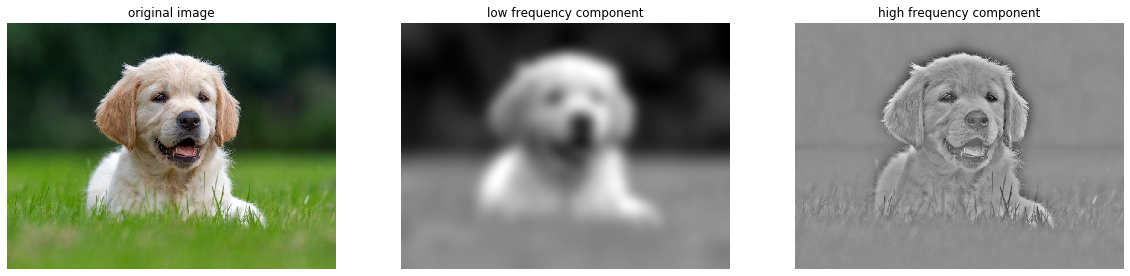

In [4]:
img = plt.imread('./dog.jpg')
low, high = split_bands(img, 20)

fig = plt.figure(figsize=(20,10))
fig.add_subplot(131)
plt.title('original image')
plt.axis('off')
plt.imshow(img)

fig.add_subplot(132)
plt.title('low frequency component')
plt.axis('off')
plt.imshow(low, cmap='gray')

fig.add_subplot(133)
plt.title('high frequency component')
plt.axis('off')
plt.imshow(high, cmap='gray')

### 3.2 Visualization [5pts]

Experiment with your ***split_bands*** function on an image of your choosing which contains a mix of content. Display the high and low frequency component for several different settings of **sigma**. Make sure and experiment to find what values of **sigma** are "too large" or "too small" to be useful and then select a few intermediate values that span this range.

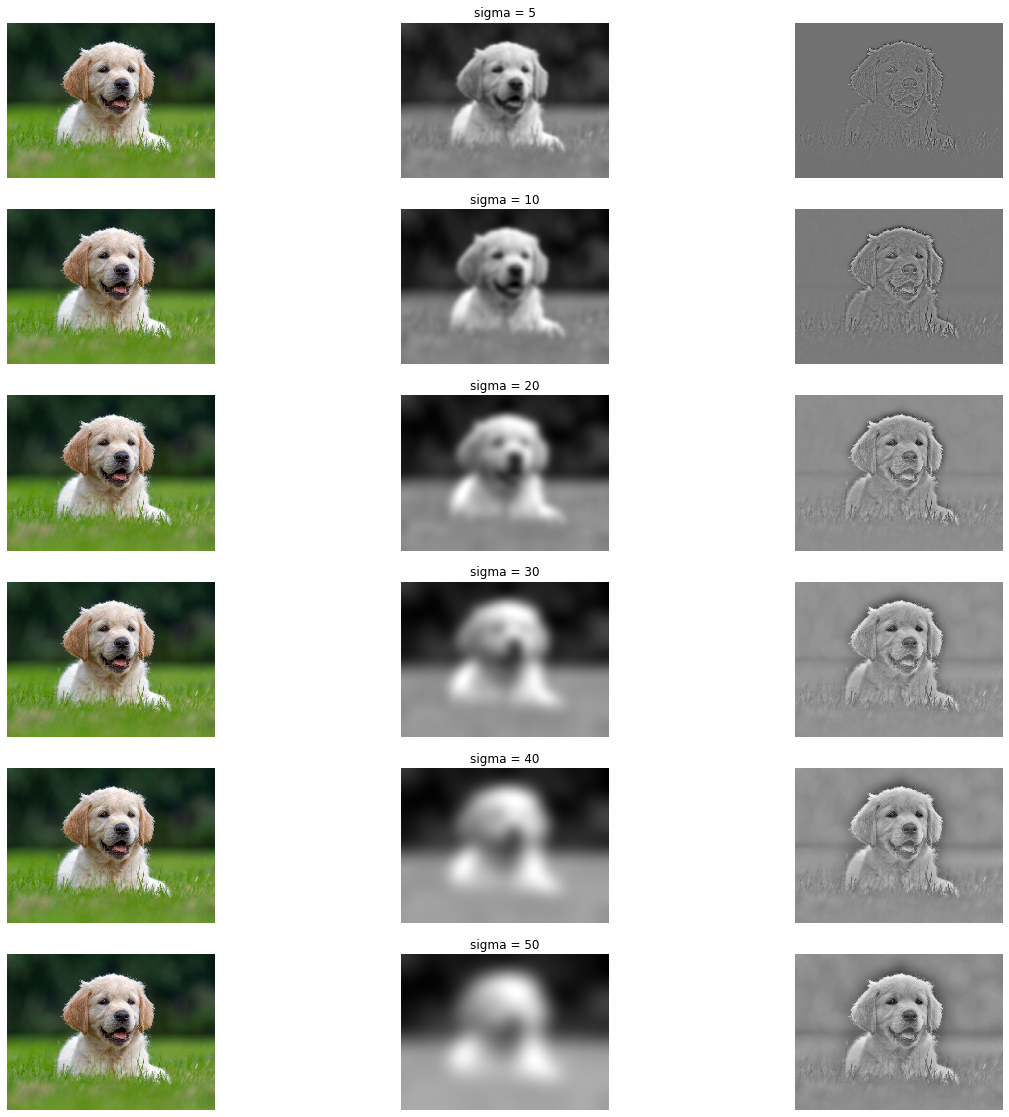

In [5]:
sigma_values = [5, 10, 20, 30, 40, 50]

total = len(sigma_values)
fig = plt.figure(figsize=(20,20))
idx = 1

for i, sigma in enumerate(sigma_values):
    fig.add_subplot(total, 3, idx)
    plt.axis('off')
    plt.imshow(img)
    idx+=1
    
    low, high = split_bands(img, sigma)
    
    fig.add_subplot(total, 3, idx)
    plt.axis('off')
    plt.title('sigma = %d' %sigma)
    plt.imshow(low, cmap='gray')
    idx+=1
    
    fig.add_subplot(total, 3, idx)
    plt.axis('off')
    plt.imshow(high, cmap='gray')
    idx+=1

### 3.3 Analysis [10pts]

What the relation is between the value of **sigma** and the content of your high and low-pass images? Ideally you should be able to come up with a formula for the frequency (measured in units of cycles-per-pixel) above which the Gaussian filter with a given **sigma** (measured in units of pixels) reduces the energy by more than 0.5. This is sometimes known as the crossover point between your low-pass and high-pass filter.

If you can't figure out how to determine this analytically, you are welcome to determine it experimentally by synthesizing a couple images with whose brightness is a **sin** function with a specific frequency, e.g.
```
x = (2*np.pi/25)*np.arange(100)
I = np.sin(x+x.reshape(100,1))
```
and then determining how large a value of sigma you need in order to reduce the amplitude by 0.5 for a few different frequencies.

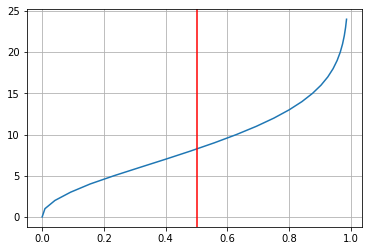

In [6]:
x = (2*np.pi/50)*np.arange(100)
I = np.sin(x+x.reshape(100,1))

energy = []

for sigma in np.arange(25):
    I_filtered_low, I_filtered_high = split_bands(I, sigma)
    energy_low = 1 - (np.max(I_filtered_low[10:,:10])/np.max(I))
    energy.append(energy_low)
    
plt.plot(energy, np.arange(25))
plt.axvline(x=0.5, color='r')
plt.grid('True')

We can approximate the crossover point to be at $\sigma = 8$

[2.220446049250313e-16, 0.008450031494334764, 0.04195755477021501, 0.09136641907904797, 0.15745168832041823, 0.2359903533956842, 0.3196157456859028, 0.40750971956244, 0.4964183752238185, 0.5794798803688832, 0.6544383359234629, 0.7233125818512434, 0.7830109540179813, 0.8315356810939063, 0.8721501700235402, 0.9049959691502296, 0.9307450038384392, 0.9497892388267831, 0.9641728607896559, 0.9747617781671941] [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


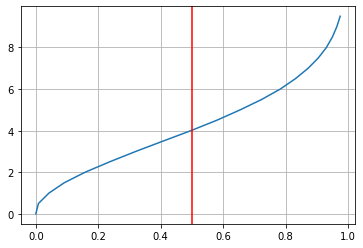

In [7]:
x = (2*np.pi/25)*np.arange(100)
I = np.sin(x+x.reshape(100,1))

energy = []

for sigma in np.arange(0,10,0.5):
    I_filtered_low, I_filtered_high = split_bands(I, sigma)
    energy_low = 1 - (np.max(I_filtered_low[10:, :10])/np.max(I))
    energy.append(energy_low)

print(energy, np.arange(0,10,0.5))    
    
plt.plot(energy, np.arange(0,10,0.5))
plt.axvline(x=0.5, color='r')
plt.grid('True')

We can approximate the crossover point to be at $\sigma = 4$

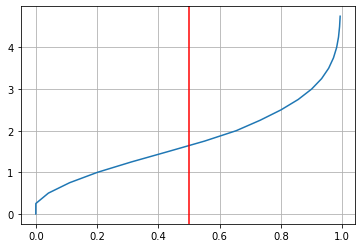

In [7]:
x = (2*np.pi/10)*np.arange(100)
I = np.sin(x+x.reshape(100,1))

energy = []

for sigma in np.arange(0,5,0.25):
    I_filtered_low, I_filtered_high = split_bands(I, sigma)
    energy_low = 1 - (np.max(I_filtered_low[10:, :10])/np.max(I))
    energy.append(energy_low)
    
plt.plot(energy, np.arange(0,5,0.25))
plt.axvline(x=0.5, color='r')
plt.grid('True')

We can estimate the crossover point to be at $\sigma=1.6$

| Frequency | $\sigma$ |1/Frequency*$\sigma$|
|-----------|-------|---------------|
| 1/50        | 8     | 6.25
|1/25 | 4| 6.25 |
|1/10 | 1.6| 6.25|

We see that the ($frequency*\sigma$) seems to be constant and approximately equal to $\frac{1}{2\pi}$.

This means that a Gaussian filter with parameter $\sigma$ will cut off all frequencies above $\frac{1}{2\pi\sigma}$

### 3.4 Hybrid Image Generation [5pts]
Choose two images for which you would like to make a hybrid. The images should be fairly closely related (e.g., two different faces, a cat and dog face, two different words of text etc.).  You will also need to adjust the images so that they are the same size and are well aligned (e.g., for faces the eyes should be at the same location). You can do this in code or in a photo editing tool.

You can then run your ***split_bands*** function on both images. Finally produce your two hybrid images by adding the low-frequency content of one image with the high-frequency of the other.  Make sure and display your two input images and the two resulting hybrid images in your notebook.

As suggested by Figure 5 in the paper, you may be able to get better results by actually running your split bands function with two different sigmas in order to insert a larger gap between the high and low frequency bands. Feel free to experiment to get a good result.


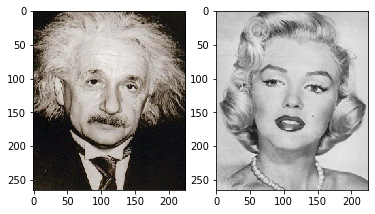

In [8]:
img1 = plt.imread('./einstein.bmp')
img2 = plt.imread('./marilyn.bmp')

plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.subplot(122)
plt.imshow(img2, cmap='gray')

low_einstein, high_einstein = split_bands(img1, sigma=4)
low_marilyn, high_marilyn = split_bands(img2, sigma=1.5)

img = low_einstein + high_marilyn

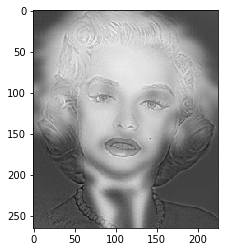

In [9]:
plt.imshow(img, cmap='gray')